<h1>preprocessing<h1>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr, f_oneway

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [285]:
# read and filter

path = '../data/scraped.csv'
df = pd.read_csv(path)

# filter out for posts w/ >1 comments
df = df[df['num_comments'] > 1]

# filter out these (uninterpretable cols)
df.drop(columns=['title', 'url', 'upvotes', 'num_comments', 'symmetry_td', ], inplace=True)

In [33]:
df.describe()

,upvote_ratio,vote-to-comment,brightness,contrast,saturation,symmetry_lr,light_balance_lr,light_balance_td,hue_diversity,dynamic_range,sharpness,thirds_balance,texture_variance,mean_sentiment
count,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3.133000e+03,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000
mean,0.851200,28.645233,95.542012,55.537653,86.344097,0.418565,16.719996,35.496906,2.933673e+00,168.231408,597.467167,0.162952,53.939386,0.657448
std,0.188047,43.229918,40.700887,16.966691,50.905428,0.268906,16.688168,31.090724,1.210491e+00,47.865617,1554.938859,0.086078,32.322294,0.148372
min,0.090000,0.000000,0.425553,0.993453,0.000000,-0.761741,0.000334,0.029472,-1.719826e-07,1.000000,0.226795,0.000352,1.514703,0.084102
25%,0.740000,0.888889,66.270850,43.920795,52.695796,0.213587,4.907052,11.151088,2.413808e+00,139.000000,62.856594,0.095362,30.563334,0.550258
50%,0.950000,5.744186,94.564342,55.320499,82.822298,0.414842,11.544091,26.132808,3.242266e+00,174.000000,193.337368,0.145190,47.381042,0.667162
75%,0.990000,42.857143,121.819691,66.481416,117.793453,0.627878,22.629766,52.712797,3.788538e+00,202.000000,540.114788,0.225657,69.470338,0.780732
max,1.000000,383.767857,250.196200,116.070749,252.352653,0.999204,125.702048,172.949332,4.920239e+00,255.000000,32201.846667,0.333333,296.758612,0.984681


In [75]:
categorical_features = ['subject_type', 'genre', 'perspective', 'color_mode', 'complexity']

In [240]:
# split by subreddit (might consider doing above)

df_itap = df[df['subreddit'] == 'itookapicture']
df_pc = df[df['subreddit'] == 'photocritique']
df_post = df[df['subreddit'] == 'postprocessing']

<h1>eda<h1>

In [347]:
print(f'itap: {df_itap['mean_sentiment'].mean()}\n')
print(f'photocritique: {df_pc['mean_sentiment'].mean()}\n')
print(f'postprocessing: {df_post['mean_sentiment'].mean()}')

itap: 0.7104449949548514

photocritique: 0.6224391628670632

postprocessing: 0.5896761256429787


In [233]:
# overall
# upvote_ratio
print('pearson')
r, p = pearsonr(df['upvote_ratio'], df['mean_sentiment'])
print(r,p)

print('spearman')
rs, ps = spearmanr(df['upvote_ratio'], df['mean_sentiment'])
print(r,p)

print('\n')

# vote-to-comment
print('pearson')
r, p = pearsonr(df['vote-to-comment'], df['mean_sentiment'])
print(r,p)

print('spearman')
rs, ps = spearmanr(df['vote-to-comment'], df['mean_sentiment'])
print(r,p)

pearson
0.5526382982395125 4.347188066616743e-250
spearman
0.5526382982395125 4.347188066616743e-250


pearson
0.44478339295833286 4.290501738747326e-152
spearman
0.44478339295833286 4.290501738747326e-152


In [246]:
# specific 

for df in [df_itap, df_pc, df_post]:
    print(f'%%% {df['subreddit'].to_list()[0]} %%%')
    # upvote_ratio
    print('pearson')
    r, p = pearsonr(df['upvote_ratio'], df['mean_sentiment'])
    print(r,p)

    print('spearman')
    rs, ps = spearmanr(df['upvote_ratio'], df['mean_sentiment'])
    print(r,p)

    print('\n')

    # vote-to-comment
    print('pearson')
    r, p = pearsonr(df['vote-to-comment'], df['mean_sentiment'])
    print(r,p)

    print('spearman')
    rs, ps = spearmanr(df['vote-to-comment'], df['mean_sentiment'])
    print(r,p)

    print('\n\n')

    # they're like not too diff

%%% itookapicture %%%
pearson
0.5700082299211755 1.762929716109722e-113
spearman
0.5700082299211755 1.762929716109722e-113


pearson
0.36335461166968114 4.5395012497382603e-42
spearman
0.36335461166968114 4.5395012497382603e-42



%%% photocritique %%%
pearson
0.529318575710846 9.832991752268131e-121
spearman
0.529318575710846 9.832991752268131e-121


pearson
0.47817223059445485 9.42328945700605e-96
spearman
0.47817223059445485 9.42328945700605e-96



%%% postprocessing %%%
pearson
0.43381566453406684 7.253404456870662e-09
spearman
0.43381566453406684 7.253404456870662e-09


pearson
0.4865807877613275 4.535998852223884e-11
spearman
0.4865807877613275 4.535998852223884e-11





In [76]:
for category in categorical_features:
    grouped = df.groupby(category)['mean_sentiment'].mean().sort_values(ascending=False)
    print(f'{category}: {grouped}\n')

# plt.figure(figsize=(8,5))
# sns.scatterplot(df, x=df['texture_variance'], y=df['mean_sentiment'])
# plt.show()

subject_type: subject_type
a nature photo showing scenery or nature                  0.699039
a photo of architecture or man-made structures            0.673117
a photo of an animal                                      0.665930
a photo of a human being                                  0.596301
a still life photo featuring arranged objects or items    0.595665
Name: mean_sentiment, dtype: float64

genre: genre
a landscape photo showing scenery or nature                     0.706050
an architectural photo emphasizing buildings or structures      0.674962
a macro or close-up photo                                       0.672481
an abstract photo                                               0.649986
a night or low-light photo with visible artificial lighting     0.649777
a portrait photo focusing on a person or face                   0.619235
a candid street photography photo capturing urban life          0.606690
an action or sports photo                                       0.601880
a s

In [77]:
# is the above just based on the data? - looks like not

for category in categorical_features:
    print(f'{df[category].value_counts()}\n')

subject_type
a nature photo showing scenery or nature                  949
a photo of a human being                                  745
a photo of architecture or man-made structures            693
a photo of an animal                                      588
a still life photo featuring arranged objects or items    158
Name: count, dtype: int64

genre
a night or low-light photo with visible artificial lighting     959
a landscape photo showing scenery or nature                     723
an architectural photo emphasizing buildings or structures      368
a candid street photography photo capturing urban life          318
a portrait photo focusing on a person or face                   199
a macro or close-up photo                                       188
an abstract photo                                               171
an action or sports photo                                       145
a still life photo of a common object or arrangement indoors     62
Name: count, dtype: int64

persp

In [102]:
for cat in categorical_features:
    groups = [df[df[cat] == c]['mean_sentiment'] for c in df[cat].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"{cat}: F={f_stat:.3f}, p={p_val:.3e}")


subject_type: F=64.354, p=2.305e-52
genre: F=22.407, p=1.493e-33
perspective: F=118.891, p=1.713e-50
color_mode: F=16.457, p=5.099e-05
complexity: F=0.092, p=7.619e-01


positive correlations to mean_sentiment:
- upvote_ratio
- vote-to-comment

no correlation (significant)
- saturation
- texture_variance

no correlation (not significant)
- brightness
- contrast
- light_balance_lr
- light_balance_td
- hue_diversity
- dynamic_range
- sharpness
- thirds_balance

<h1>visuals, categorical<h1>

<h3>image content<h3>

In [207]:
# function to plot the scatters based on the given df and category type
def plot_category_by_sentiment(df, category):
    if len(df[category].unique()) > 3:
        plt.figure(figsize=(7,8))
    else:  
        plt.figure(figsize=(4,8))

    sns.stripplot(data=df, x=df[category], y=df['mean_sentiment'], dodge=False, alpha=0.2, hue=category)
    sns.pointplot(data=df, x=df[category], y='mean_sentiment', estimator='mean', color='black', markers='D', linestyles='--')

    plt.title(f'Sentiment rating by {category}')
    plt.xlabel(f'{category}')
    plt.ylabel(f'Sentiment rating')

    plt.show()

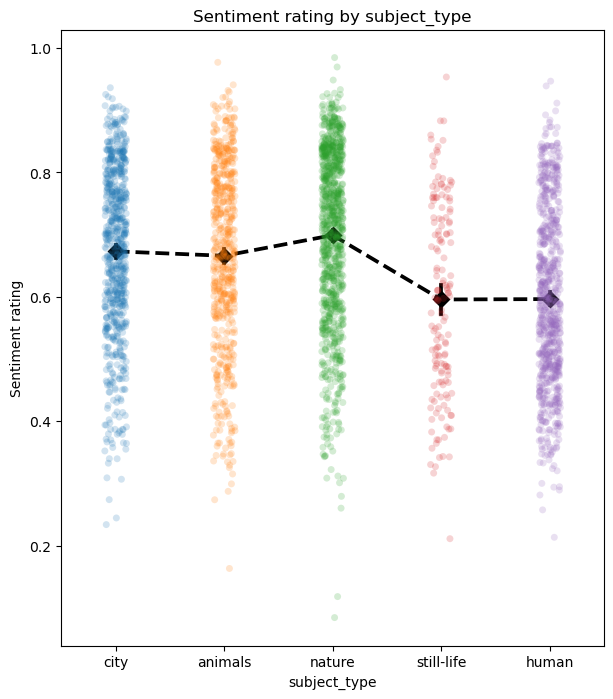

In [208]:
### plt.title('Sentiment rating by subject type')

df_c1 = df.copy()

df_c1['subject_type'] = df_c1['subject_type'].replace({
    'a photo of architecture or man-made structures': 'city',
    'a photo of an animal': 'animals',
    'a nature photo showing scenery or nature': 'nature',
    'a still life photo featuring arranged objects or items': 'still-life',
    'a photo of a human being': 'human'})


plot_category_by_sentiment(df_c1, category='subject_type')

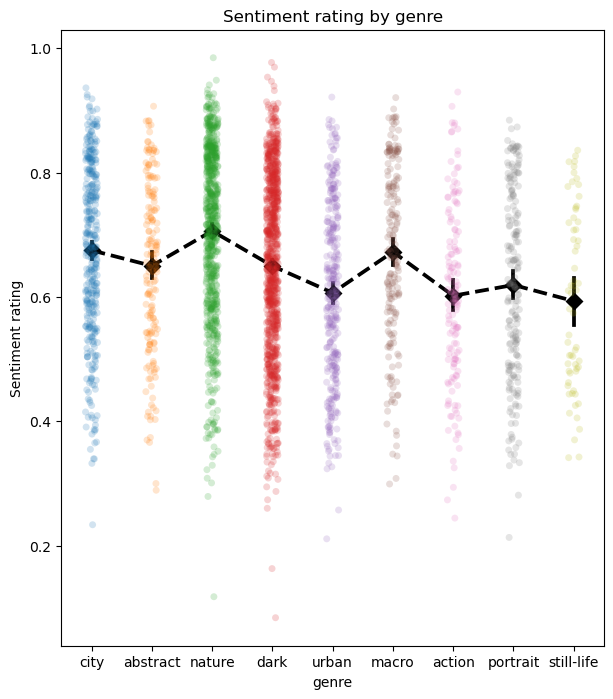

In [191]:
### plt.title('Sentiment rating by genre')

df_c2 = df.copy()

df_c2['genre'] = df_c2['genre'].replace({
    'an architectural photo emphasizing buildings or structures': 'city',
    'an abstract photo': 'abstract', 
    'a landscape photo showing scenery or nature': 'nature',
    'a night or low-light photo with visible artificial lighting': 'dark',
    'a candid street photography photo capturing urban life': 'urban',
    'a macro or close-up photo': 'macro', 
    'an action or sports photo': 'action',
    'a portrait photo focusing on a person or face': 'portrait',
    'a still life photo of a common object or arrangement indoors': 'still-life'})


plot_category_by_sentiment(df_c2, category='genre')

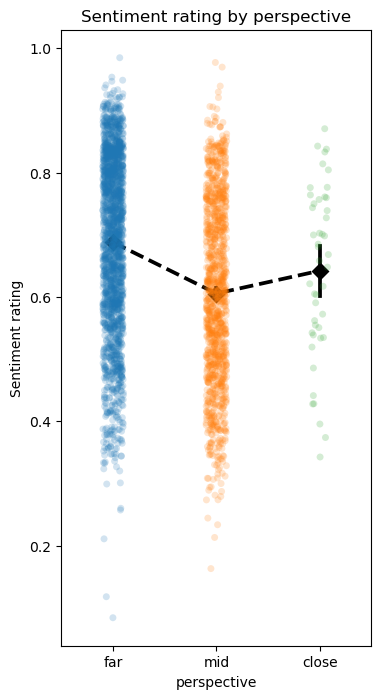

In [195]:
### plt.title('Sentiment rating by perspective')

df_c3 = df.copy()

df_c3['perspective'] = df_c3['perspective'].replace({
    'a wide or far distance photo emphasizing scenes or large areas with small subjects': 'far',
    'a medium distance photo showing the subject with some background context': 'mid',
    'a close-up photo filling the frame with the subject': 'close'})


plot_category_by_sentiment(df_c3, category='perspective')

In [180]:
df['color_mode'].unique()

array(['a color photo with natural or vivid tones',
       'a black and white or monochrome photos'], dtype=object)

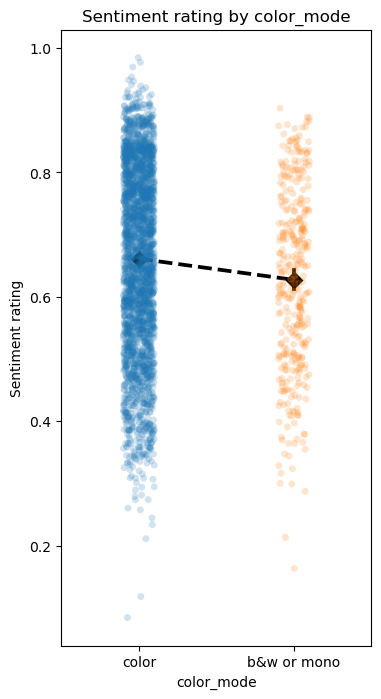

In [196]:
### plt.title('Sentiment rating by color_mode')

df_c4 = df.copy()

df_c4['color_mode'] = df_c4['color_mode'].replace({
    'a color photo with natural or vivid tones': 'color',
    'a black and white or monochrome photos': 'b&w or mono'})


plot_category_by_sentiment(df_c4, category='color_mode')

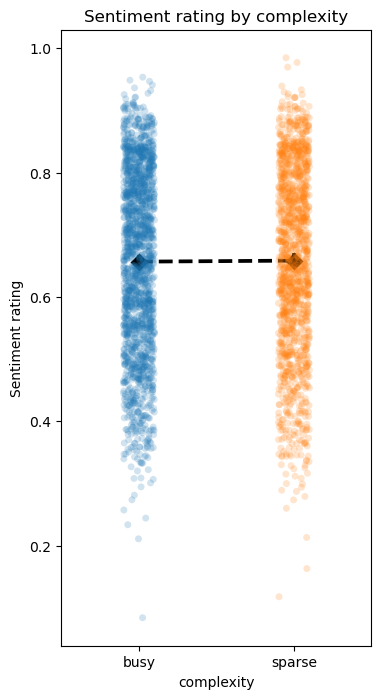

In [200]:
### plt.title('Sentiment rating by complexity')

df_c5 = df.copy()

df_c5['complexity'] = df_c4['complexity'].replace({
    'a busy photo with many subjects, objects, or visual details filling the frame': 'busy',
    'a simple photo focusing on just a few clear subjects': 'sparse'})


plot_category_by_sentiment(df_c5, category='complexity')

<h1>visuals, continuous<h1>

<h3>post & image metadata<h3>

/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_72111/1957708657.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x='bin_order', y='mean_sentiment', palette='rocket_r', order=bin_categories)


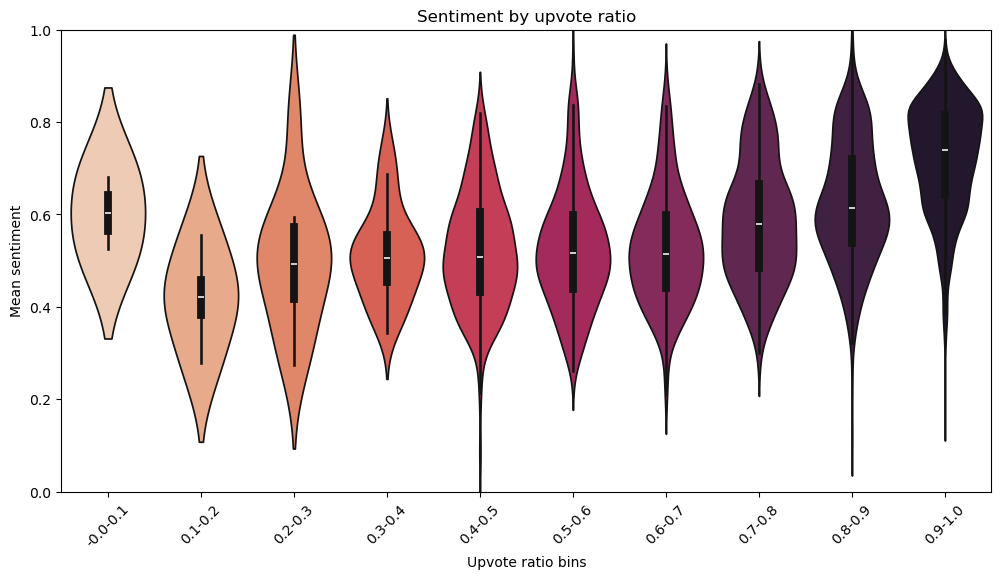

In [303]:
# plt.title('Sentiment by upvote ratio')

df1 = df.copy()

bins = np.linspace(0, 1, 11)
df1['upvote_bin'] = pd.cut(df1['upvote_ratio'], bins, include_lowest=True)

bin_categories = pd.cut([0], bins, include_lowest=True).categories
df1['bin_order'] = pd.Categorical(df1['upvote_bin'], categories=bin_categories, ordered=True)

bin_labels = [f"{interval.left:.1f}-{interval.right:.1f}" for interval in bin_categories]

# plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df1, x='bin_order', y='mean_sentiment', palette='rocket_r', order=bin_categories)
plt.xticks(range(len(bin_labels)), bin_labels, rotation=45)
plt.xlabel('Upvote ratio bins')
plt.ylabel('Mean sentiment')
plt.title('Sentiment by upvote ratio')
plt.ylim(0, 1)

plt.show()

/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_72111/3969042103.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x='bin_order', y='mean_sentiment', palette='mako_r', order=bin_categories)


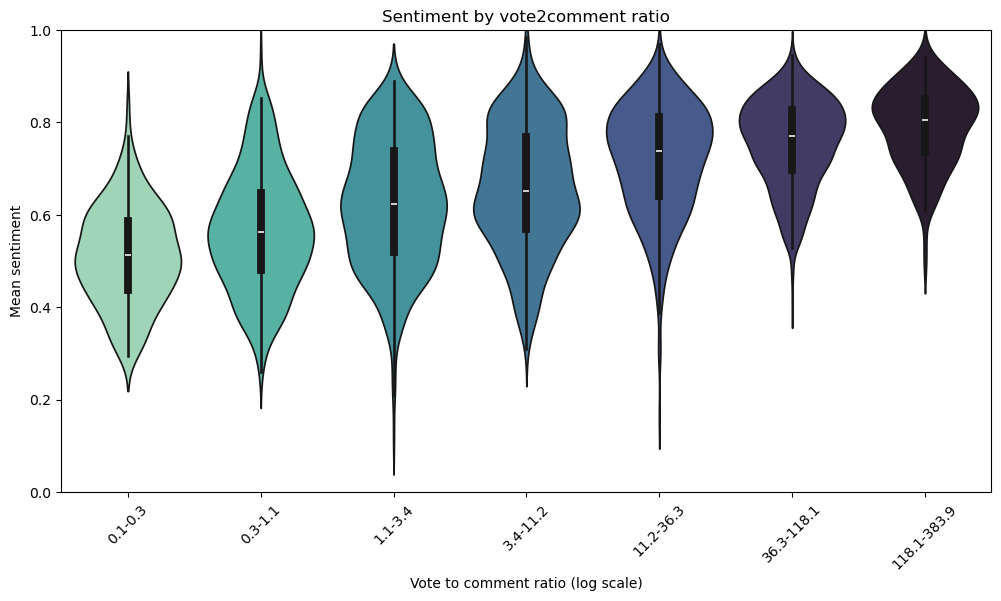

In [310]:
# plt.title('Sentiment by vote2comment ratio')

df2 = df.copy()

# create scaled log bins
min_val = df2['vote-to-comment'].min()
max_val = df2['vote-to-comment'].max()

log_bins = np.logspace(np.log10(min_val + 0.1), np.log10(max_val + 0.1), 8)
df2['v2cbin'] = pd.cut(df2['vote-to-comment'], log_bins, include_lowest=True)

bin_categories = pd.cut([min_val], log_bins, include_lowest=True).categories
df2['bin_order'] = pd.Categorical(df2['v2cbin'], categories=bin_categories, ordered=True)

bin_labels = [f"{interval.left:.1f}-{interval.right:.1f}" for interval in bin_categories]

# plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df2, x='bin_order', y='mean_sentiment', palette='mako_r', order=bin_categories)
plt.xticks(range(len(bin_labels)), bin_labels, rotation=45)
plt.xlabel('Vote to comment ratio (log scale)')
plt.ylabel('Mean sentiment')
plt.title('Sentiment by vote2comment ratio')
plt.ylim(0, 1)

plt.show()

/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_72111/2428671834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df3, x='subreddit', y='mean_sentiment', palette='viridis_r')
/var/folders/1c/h8d9s2m12xl44x37yf7xzw5h0000gn/T/ipykernel_72111/2428671834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(df3, x='subreddit', y='mean_sentiment', alpha=0.1, palette='viridis_r')


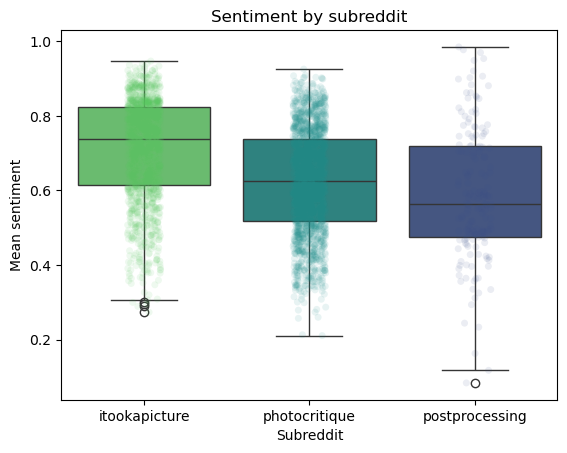

In [367]:
# plt.title('Sentiment by subreddit')

df3 = df.copy()

sns.boxplot(df3, x='subreddit', y='mean_sentiment', palette='viridis_r')
sns.stripplot(df3, x='subreddit', y='mean_sentiment', alpha=0.1, palette='viridis_r')
plt.xlabel('Subreddit')
plt.ylabel('Mean sentiment')
plt.title('Sentiment by subreddit')

plt.show()

<h3>image features & visual properties<h3>

In [330]:
all_img_fts = ['brightness', 'contrast', 'saturation', 'symmetry_lr', 'light_balance_lr', 'light_balance_td', 
           'hue_diversity', 'dynamic_range', 'texture_variance']

# 'sharpness', 'thirds_balance', 

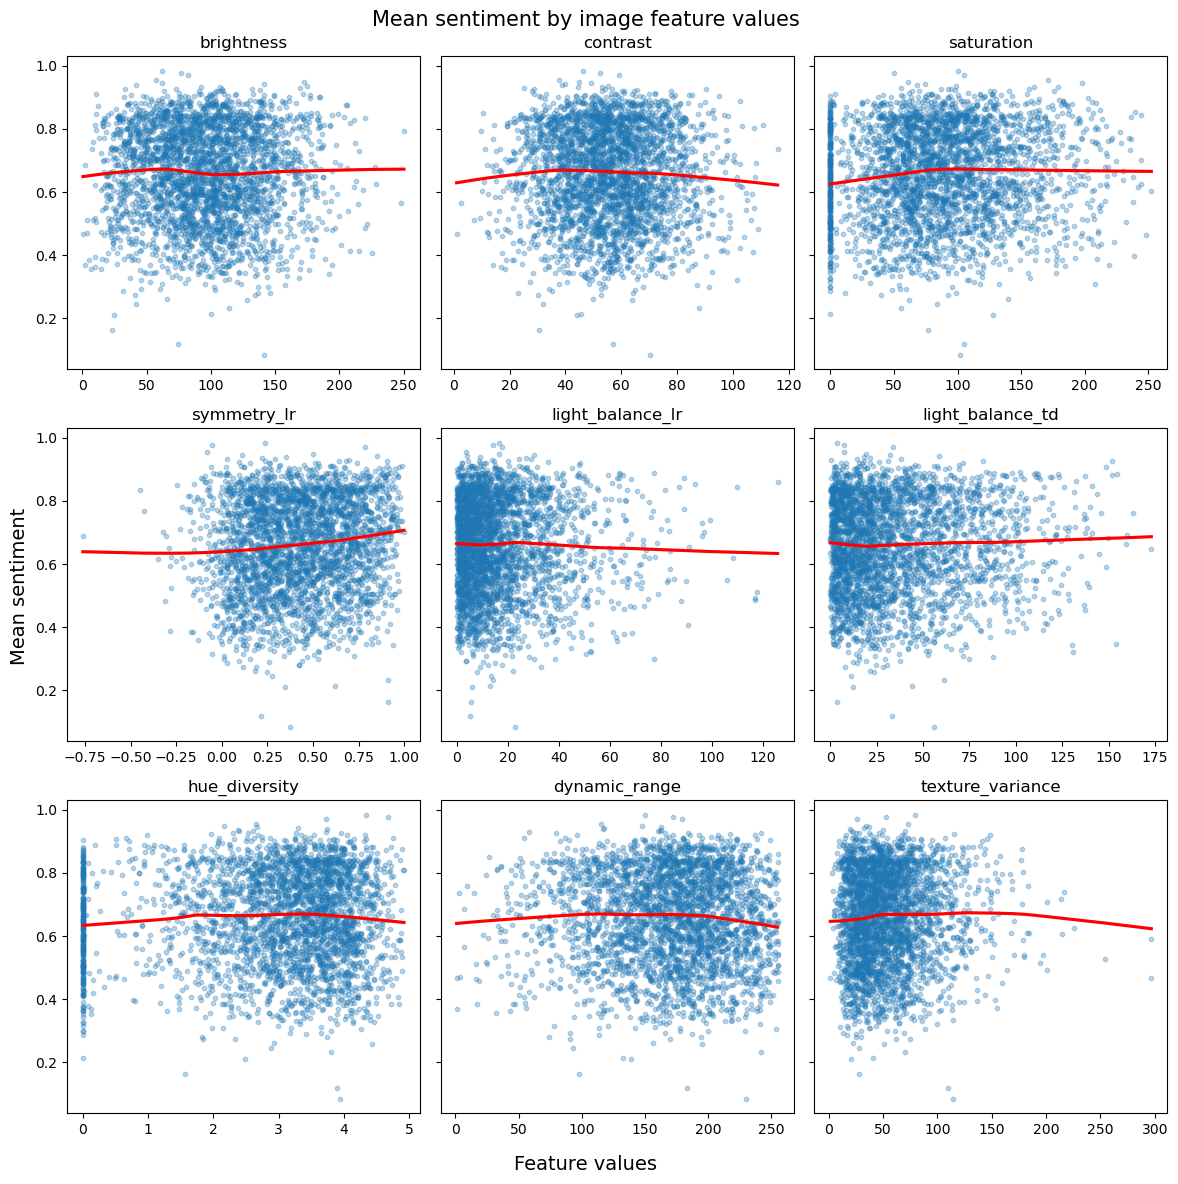

In [342]:
# fig.suptitle("Mean sentiment by image feature values")
ncols = 3
nrows = int(np.ceil(len(all_img_fts)/ncols))

fig, axes = plt.subplots(nrows, ncols, sharey=True, figsize=(12, 12))
axes = axes.flatten()

for i, feat in enumerate(all_img_fts):
    sns.regplot(x=feat, y='mean_sentiment', data=df, lowess=True, 
        scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'}, ax=axes[i])
    
    axes[i].set_title(feat)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

fig.suptitle("Mean sentiment by image feature values", fontsize=15)
fig.supxlabel("Feature values", fontsize=14)
fig.supylabel("Mean sentiment", fontsize=14)
fig.tight_layout()

plt.show()
